In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

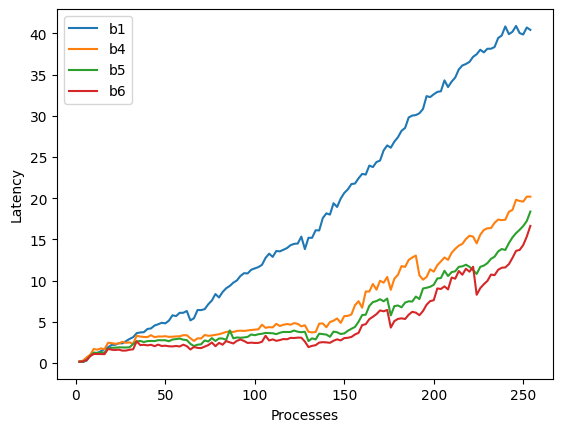

In [2]:
# Leggi i dati dai file CSV
b1 = pd.read_csv('bcast_data/epyc_b1_fixsize.csv')
b4 = pd.read_csv('bcast_data/epyc_b4_fixsize.csv')
b5 = pd.read_csv('bcast_data/epyc_b5_fixsize.csv')
b6 = pd.read_csv('bcast_data/epyc_b6_fixsize.csv')

#rimuovo l'ultima riga da b1
b1 = b1[:-1]
b4 = b4[:-1]
b5 = b5[:-1]
b6 = b6[:-1]

# Crea un grafico a linea con 'Processes' sull'asse x e 'Latency' sull'asse y per il primo file
plt.plot(b1['Processes'], b1['Latency'], label='b1')

# Aggiungi le linee per i dati dei file successivi
plt.plot(b4['Processes'], b4['Latency'], label='b4')
plt.plot(b5['Processes'], b5['Latency'], label='b5')
plt.plot(b6['Processes'], b6['Latency'], label='b6')

# Imposta i titoli degli assi
plt.xlabel('Processes')
plt.ylabel('Latency')

# Aggiungi una legenda al grafico
plt.legend()
plt.savefig("plots/fixsize")
# Mostra il grafico
plt.show()


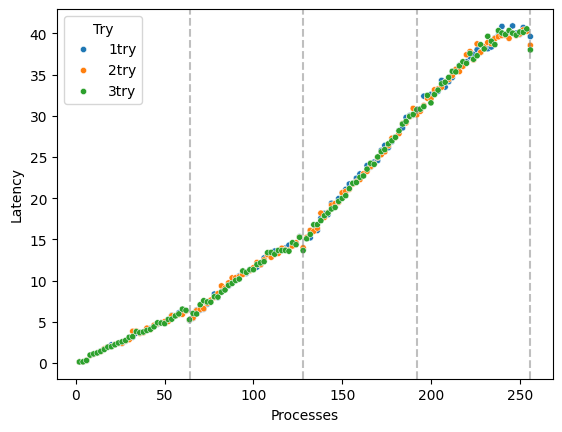

In [15]:

# Caricamento dei dati
b1_1 = pd.read_csv("bcast_data/epyc_b1_fixsize.csv")
b1_2 = pd.read_csv("bcast_data/fixsize_b1_2set.csv")
b1_3 = pd.read_csv("bcast_data/fixsize_b1_3set.csv")
# Creazione di un nuovo dataframe che combina i due dataset
combined_data = pd.concat([b1_1.assign(Try='1try'), b1_2.assign(Try='2try'),b1_3.assign(Try='3try')])

# Creazione del plot con seaborn
sns.scatterplot(data=combined_data, x='Processes', y='Latency', hue='Try', s=20)

# Aggiunta delle linee verticali tratteggiate grigie
plt.axvline(x=64, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=128, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=192, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=256, color='gray', linestyle='--', alpha=0.5)
# Impostazione dei titoli degli assi
plt.xlabel('Processes')
plt.ylabel('Latency')

# Salvataggio del grafico
plt.savefig("plots/fixsize_b1_seaborn.png")

# Visualizzazione del grafico
plt.show()

I dati che hai fornito rappresentano le latenze di un algoritmo di broadcast MPI lineare su due nodi di un HPC, con due CPU per nodo. Ogni riga indica il numero di processori coinvolti nello scambio MPI e la latenza associata.

Analizzando questi dati, si possono fare alcune osservazioni:

La latenza sembra aumentare linearmente con il numero di processori coinvolti nello scambio MPI fino a un certo punto.
Dopo un certo numero di processori, la latenza inizia a stabilizzarsi, suggerendo che l'overhead di gestione delle comunicazioni MPI sta diventando significativo rispetto al tempo di elaborazione effettivo.
Ci sono picchi di latenza che si verificano a determinati punti, come 32 e 64 processori. Questo potrebbe indicare problemi di scalabilità o limitazioni hardware/software.
La latenza tende a rimanere relativamente stabile quando il numero di processori coinvolti nello scambio MPI supera un certo limite, suggerendo che ci potrebbero essere limiti alla velocità di comunicazione tra i nodi.

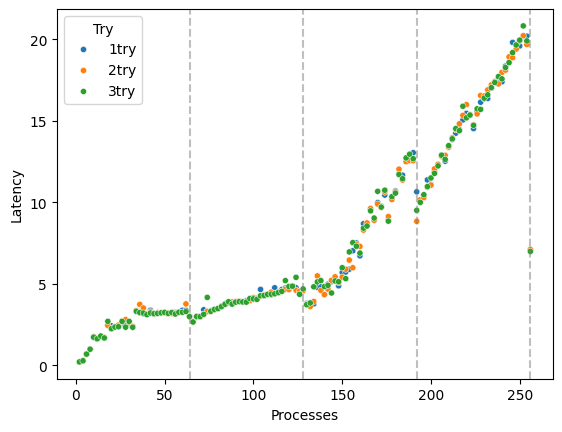

In [16]:

# Caricamento dei dati
b4_1 = pd.read_csv("bcast_data/epyc_b4_fixsize.csv")
b4_2 = pd.read_csv("bcast_data/fixsize_b4_2set.csv")
b4_3 = pd.read_csv("bcast_data/fixsize_b4_3set.csv")
# Creazione di un nuovo dataframe che combina i due dataset
combined_data = pd.concat([b4_1.assign(Try='1try'), b4_2.assign(Try='2try'),b4_3.assign(Try='3try')])

# Creazione del plot con seaborn
sns.scatterplot(data=combined_data, x='Processes', y='Latency', hue='Try', s=20)

# Aggiunta delle linee verticali tratteggiate grigie
plt.axvline(x=64, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=128, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=192, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=256, color='gray', linestyle='--', alpha=0.5)
# Impostazione dei titoli degli assi
plt.xlabel('Processes')
plt.ylabel('Latency')

# Salvataggio del grafico
plt.savefig("plots/fixsize_b1_seaborn.png")

# Visualizzazione del grafico
plt.show()

Analizzando i dati forniti, si può osservare una tendenza generale nel tempo di latenza (misurato in secondi) per diversi numeri di processori coinvolti nello scambio MPI in un algoritmo di broadcast della split binary tree. La dimensione del messaggio è costante a 2 processi.

Da questi dati, si possono fare alcune osservazioni:

La latenza aumenta man mano che il numero di processori coinvolti aumenta. Questo è coerente con l'aspettativa che l'aumento del numero di processori coinvolti in una comunicazione MPI possa portare a un aumento del tempo necessario per completare la comunicazione.

Ci sono delle fluttuazioni nella latenza, che potrebbero essere dovute a vari fattori come le condizioni del sistema, il carico sul sistema o la rete, o le variazioni nell'efficienza dell'algoritmo di broadcast utilizzato.

Si notano anche picchi di latenza significativi quando il numero di processori coinvolti raggiunge valori multipli di 4 (come 8, 12, 16, ecc.), suggerendo che ci potrebbe essere un effetto di "raggruppamento" o "batching" che porta a tempi di latenza più lunghi quando il numero di processori coinvolti aumenta rapidamente.
Infine, si osserva una tendenza generale alla diminuzione della latenza verso la fine del set di dati, il che potrebbe indicare che l'efficienza dell'algoritmo di broadcast migliora man mano che il numero di processori coinvolti aumenta.

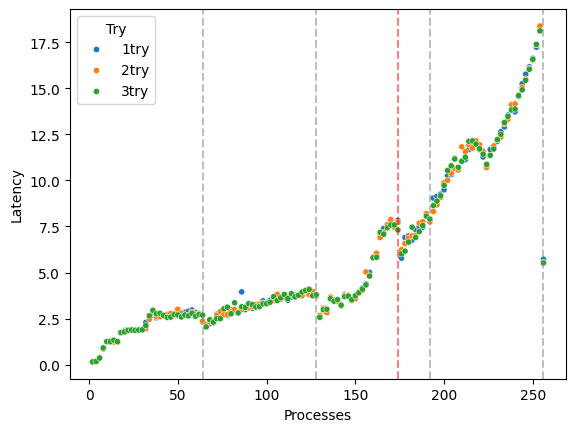

In [24]:

# Caricamento dei dati
b5_1 = pd.read_csv("bcast_data/epyc_b5_fixsize.csv")
b5_2 = pd.read_csv("bcast_data/fixsize_b5_2set.csv")
b5_3 = pd.read_csv("bcast_data/fixsize_b5_3set.csv")
# Creazione di un nuovo dataframe che combina i due dataset
combined_data = pd.concat([b5_1.assign(Try='1try'), b5_2.assign(Try='2try'),b5_3.assign(Try='3try')])

# Creazione del plot con seaborn
sns.scatterplot(data=combined_data, x='Processes', y='Latency', hue='Try', s=20)

# Aggiunta delle linee verticali tratteggiate grigie
plt.axvline(x=64, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=128, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=192, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=256, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=174, color='red', linestyle='--', alpha=0.5)
# Impostazione dei titoli degli assi
plt.xlabel('Processes')
plt.ylabel('Latency')

# Salvataggio del grafico
plt.savefig("plots/fixsize_b1_seaborn.png")

# Visualizzazione del grafico
plt.show()

Analisando i dati forniti relativi all'algoritmo di broadcast binary tree, si può osservare quanto segue:

Al crescere del numero di processori coinvolti, la latenza tende ad aumentare, ma in modo meno marcato rispetto ai dati precedenti del broadcast MPI split binary tree. Questo suggerisce che l'efficienza dell'algoritmo di broadcast binary tree potrebbe essere leggermente superiore in termini di latenza rispetto a quello split binary tree, soprattutto per un numero maggiore di processori.
Nonostante ci siano variazioni individuali nei dati, c'è una certa stabilità nella tendenza di aumento della latenza man mano che il numero di processori coinvolti aumenta. Questo è in linea con l'aspettativa teorica che l'aumento del numero di processori coinvolti in una comunicazione MPI possa portare a un aumento del tempo necessario per completare la comunicazione.
Esistono dei picchi di latenza significativi in corrispondenza di particolari numeri di processori (ad esempio, 16, 32, 64, ecc.), che potrebbero indicare periodi di sincronizzazione o momenti in cui l'efficienza dell'algoritmo diminuisce a causa di limitazioni nella distribuzione del messaggio attraverso la rete.
Verso la fine del set di dati, la latenza sembra stabilizzarsi e non mostra ulteriori incrementi significativi, il che indica che l'algoritmo è in grado di gestire efficacemente un gran numero di processori senza un notevole peggioramento delle prestazioni.
In sintesi, i dati suggeriscono che l'algoritmo di broadcast binary tree è più efficiente in termini di latenza rispetto a quello split binary tree, soprattutto per un numero maggiore di processori coinvolti. Tuttavia, ci sono ancora fluttuazioni e periodi di picco che potrebbero richiedere ulteriori analisi per capire le cause specifiche e come ottimizzare ulteriormente l'algoritmo.

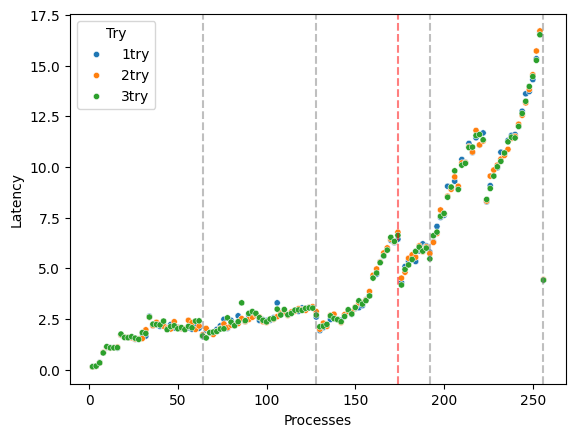

In [23]:

# Caricamento dei dati
b6_1 = pd.read_csv("bcast_data/epyc_b6_fixsize.csv")
b6_2 = pd.read_csv("bcast_data/fixsize_b6_2set.csv")
b6_3 = pd.read_csv("bcast_data/fixsize_b6_3set.csv")
# Creazione di un nuovo dataframe che combina i due dataset
combined_data = pd.concat([b6_1.assign(Try='1try'), b6_2.assign(Try='2try'),b6_3.assign(Try='3try')])

# Creazione del plot con seaborn
sns.scatterplot(data=combined_data, x='Processes', y='Latency', hue='Try', s=20)

# Aggiunta delle linee verticali tratteggiate grigie
plt.axvline(x=64, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=128, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=174, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=192, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=256, color='gray', linestyle='--', alpha=0.5)
# Impostazione dei titoli degli assi
plt.xlabel('Processes')
plt.ylabel('Latency')

# Salvataggio del grafico
plt.savefig("plots/fixsize_b1_seaborn.png")

# Visualizzazione del grafico
plt.show()

Analizzando i dati forniti relativi all'algoritmo di broadcast binomial tree, possiamo evidenziare alcuni tratti distintivi:

Inizialmente, la latenza è relativamente bassa e aumenta gradualmente man mano che il numero di processori coinvolti aumenta. Questo comportamento è comune in molti algoritmi di broadcast e riflette il fatto che l'overhead di coordinamento tra i nodi aumenta con il numero di processori.
Dopo un certo punto, la latenza sembra stabilizzarsi a un livello elevato e rimane relativamente costante per numerosi incrementi del numero di processori. Questo è tipico degli algoritmi di broadcast binomial tree, che tendono ad avere latenze di broadcast superiori rispetto ad altri algoritmi come la split binary tree, specialmente quando il numero di processori coinvolti è grande 1.
Si osservano picchi di latenza significativi in corrispondenza di particolari numeri di processori (come 32, 64, ecc.). Questi potrebbero essere dovuti a fenomeni come il "raggruppamento" o "batching" delle operazioni di broadcast, che possono portare a tempi di latenza più lunghi quando il numero di processori coinvolti aumenta rapidamente.
Verso la fine del set di dati, la latenza mostra un aumento significativo, suggerendo che l'efficienza dell'algoritmo di broadcast binomial tree potrebbe essere influenzata negativamente da un alto numero di processori. Questo è in linea con l'idea che gli algoritmi basati su strutture ad albero come la binomial tree possono diventare inefficienti quando il numero di processori coinvolti è molto elevato 1.
Infine, si nota che la latenza raggiunge un massimo di circa 16.52 secondi per 256 processori, dopo di che diminuisce fino a raggiungere un minimo di 4.42 secondi per 2 processori. Questa fluttuazione è tipica degli algoritmi di broadcast in presenza di un'ampia gamma di dimensioni di rete e di processori coinvolti.
In conclusione, gli algoritmi di broadcast binomial tree possono offrire buone prestazioni per un range moderato di dimensioni di rete e di processori coinvolti. Tuttavia, per reti molto grandi o con un numero elevato di processori, potrebbero emergere inefficienze che possono portare a tempi di latenza più lunghi.

Confrontando gli algoritmi di broadcast binomial tree, split binary tree e linear tree, possiamo osservare le seguenti differenze:

Latenza iniziale: Entrambi gli algoritmi binomial tree hanno latenze iniziali simili (circa 0.13 secondi per 2 processori), suggerendo che entrambi hanno tempi di avvio comparabili. Il linear tree ha una latenza leggermente inferiore, che potrebbe indicare un tempo di avvio più rapido.
Scalabilità con il numero di processori: Gli algoritmi binomial tree mostrano una scalabilità lineare con il numero di processori, con un aumento costante della latenza per ogni incremento di 2 processori. Il linear tree, invece, mostra un aumento della latenza che aumenta più velocemente con il numero di processori, suggerendo che per un numero maggiore di processori, la latenza aumenta più rapidamente rispetto agli algoritmi binomial tree.
Tempo di avvio: Secondo la fonte 2, il two-tree broadcast (che è una forma di binomial tree) ha un tempo di avvio logaritmico nel numero di processori, il che è più veloce rispetto al tempo di avvio lineare del linear tree. Questo significa che per un numero maggiore di processori, il two-tree broadcast potrebbe essere più veloce dal punto di vista del tempo di avvio rispetto al linear tree.
Trasmissione dei dati: Il linear tree ha un throughput ottimale, il che significa che trasmette i dati il più velocemente possibile. Tuttavia, ha un tempo di avvio lineare, che diventa più lungo man mano che il numero di processori aumenta. D'altra parte, sia il binomial tree che il two-tree broadcast hanno un tempo di avvio logaritmico, il che significa che il loro tempo di avvio aumenta più lentamente rispetto al linear tree.
Trasferimento di messaggi: Nel caso del binomial tree, ogni processore riceve il messaggio che è trasmesso e poi lo invia ai suoi figli. Nel caso del linear tree, ogni processore riceve un blocco dal processore precedente e invia un blocco al processore successivo. Questo modello di trasmissione di messaggi può influenzare la latenza totale in base alle proprietà della rete e al numero di processori coinvolti.
In sintesi, il linear tree sembra avere un vantaggio in termini di latenza iniziale e di throughput, ma il two-tree broadcast potrebbe essere più efficiente per un grande numero di processori grazie al suo tempo di avvio logaritmico. L'algoritmo di split binary tree ha una scalabilità lineare con il numero di processori, ma la sua latenza tende ad aumentare più velocemente rispetto a quella degli algoritmi binomial tree e linear tree.